<a href="https://colab.research.google.com/github/Sangh0/DeepLearning-Tutorial/blob/main/current_materials/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent 구현

    부제: 뉴턴과 라이프니츠가 없었다면 현재의 chatGPT도, AI도, 나도 없었다...

- 딥러닝 모델은 어떻게 최적의 파라미터를 찾는지 궁금하지 않나요
- 단순히 무지성으로 예측하는 것이 아닌 얼마나 정교하게 수학을 이용하는지 이번 챕터에서 살펴볼 겁니다


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터 생성
X_train = np.random.rand(100) # 0~1 사이의 균일 분포 난수 100개 생성
y_train = 3 * X_train + 4 + np.random.rand(100)

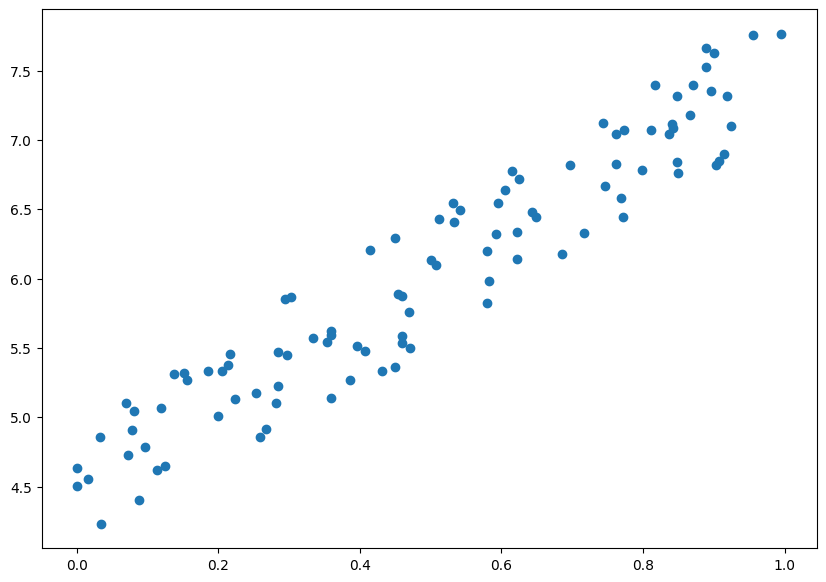

In [ ]:
# train 데이터 scatter 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train)
plt.show()

## Define model's equation and loss function
$$model\,\,equation = y_{pred} = w\cdot x + b$$
$$f(x)=\frac{1}{n}\sum_i^n\frac{1}{2}\left(y_{pred}-y_{true}\right)^2$$
$$\Rightarrow f(x)=\frac{1}{2n}\sum_i^n\left(w\cdot x + b - y_{true}\right)^2\qquad (1)$$

## Gradient Descent Algorithm
$$\frac{\partial}{\partial w} f(x)=\frac{1}{n}\sum_i^n x \left(w\cdot x + b - y_{true}\right)$$
$$\frac{\partial}{\partial b}f(x)=\frac{1}{n}\sum_i^n\left(w\cdot x + b - y_{true}\right)$$

$$w_{n+1}=w_n - lr \cdot \frac{\partial}{\partial w}f(x)\qquad (2)$$
$$b_{n+1} = b_n - lr \cdot \frac{\partial}{\partial b}f(x)\qquad (3)$$

In [ ]:
# weight, bias 초깃값 설정 (아무거나 설정해도 됨)
w = 1.2
b = 0.2

# 하이퍼파라미터 설정
max_iterations = 100
learning_rate = 0.2

In [ ]:
# gradient descent optimizer로 학습

# 학습하면서 loss 담을 리스트 정의
loss_list = []

# max_iterations 만큼 학습
for iteration in range(max_iterations):
    # 위에서 정의한 모델 방정식에 의해 y_pred = w * x + b 연산
    y_pred = w * X_train + b

    # loss 구하기
    loss = (1/2 * (y_pred - y_train) ** 2).mean()   # 식 1에 해당
    # loss_list에 담기
    loss_list.append(loss)

    # 만약 loss가 0.01보다 작으면 브레이크
    if loss < 0.01:
        break

    # gradient descent 업데이트
    w = w - learning_rate * ((y_pred - y_train) * X_train).mean() # 식 2에 해당
    b = b - learning_rate * (y_pred - y_train).mean() # 식 3에 해당

    print(f'iteration {iteration+1}/{max_iterations}  weight = {w:.3f}, bias = {b:.3f}, loss = {loss:.3f}')

iteration 1/100  weight = 1.750, bias = 1.246, loss = 13.857
iteration 2/100  weight = 2.160, bias = 2.028, loss = 7.753
iteration 3/100  weight = 2.466, bias = 2.613, loss = 4.346
iteration 4/100  weight = 2.693, bias = 3.051, loss = 2.445
iteration 5/100  weight = 2.861, bias = 3.378, loss = 1.384
iteration 6/100  weight = 2.986, bias = 3.624, loss = 0.792
iteration 7/100  weight = 3.078, bias = 3.807, loss = 0.461
iteration 8/100  weight = 3.146, bias = 3.945, loss = 0.277
iteration 9/100  weight = 3.195, bias = 4.049, loss = 0.174
iteration 10/100  weight = 3.231, bias = 4.126, loss = 0.116
iteration 11/100  weight = 3.257, bias = 4.185, loss = 0.084
iteration 12/100  weight = 3.275, bias = 4.230, loss = 0.066
iteration 13/100  weight = 3.288, bias = 4.263, loss = 0.056
iteration 14/100  weight = 3.297, bias = 4.289, loss = 0.050
iteration 15/100  weight = 3.302, bias = 4.309, loss = 0.047
iteration 16/100  weight = 3.305, bias = 4.324, loss = 0.045
iteration 17/100  weight = 3.306

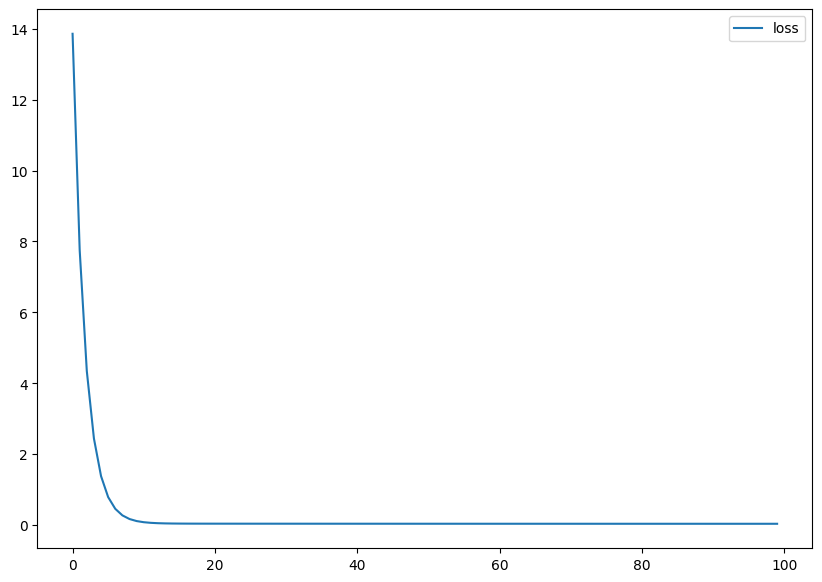

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(loss_list, label='loss')
plt.legend()
plt.show()

- 일반적으로 우리가 실생활에서 또는 기업에서 다루는 머신러닝 또는 딥러닝 모델을 학습할 때는 loss 그래프가 일관적으로 줄어들지 않아요
- 굉장히 복잡한 데이터셋을 학습하고 또 복잡한 loss function을 다루다보니 아래와 같이 loss가 매우 심하게 튀어요

<img src = "https://github.com/Sangh0/Segmentation/blob/main/PIDNet/figure/logs/train/Train_Total%20Loss.png?raw=true">

- 이 loss 그래프는 제가 real-time semantic segmentation 모델을 학습할 때 기록한 거예요

In [ ]:
# 모델이 찾은 weight와 bias 확인하기
print('weight:', w, 'bias:', b)

weight: 3.126693767908011 bias: 4.468565393688659


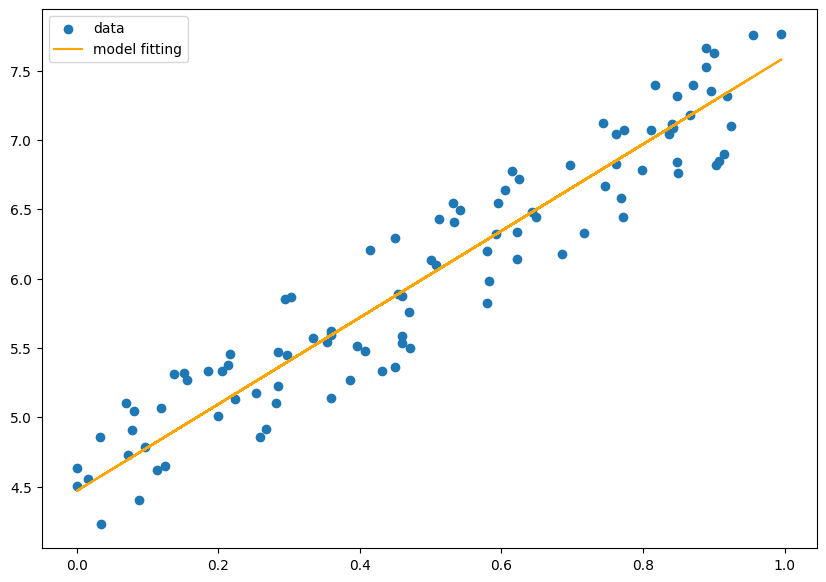

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, label='data')
plt.plot(X_train, X_train * w + b, label='model fitting', color='orange')
plt.legend(loc='best')
plt.show()

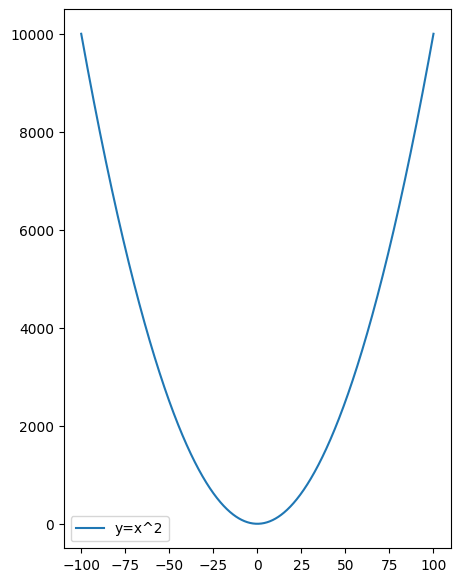

In [ ]:
"""
어떻게 loss가 너무 깔끔하게 줄어들기만하다가 수렴하는지 궁금하지 않나요

우리가 설정한 loss function은 mean squared error예요
즉, 2차 함수죠

2차 함수를 시각화해 볼까요
"""

# y = x^2이라는 함수 정의
def mse(x):
    y = x ** 2
    return y


# -100부터 100까지의 데이터 1000개 균일한 간격으로 생성
x = np.linspace(-100, 100, 1000)
# y = x^2 함수에 넣기
y = mse(x)

# 시각화
plt.figure(figsize=(5, 7))
plt.plot(x, y, label="y=x^2")
plt.legend()
plt.show()

- 위와 같이 아래로 볼록한 2차 함수라면 gradient descent 알고리즘은 어떤 초깃값이든 무조건 수렴하게 되어 있어요
- 만약 3차, 4차, 5차 함수라면 어떻게 될까요

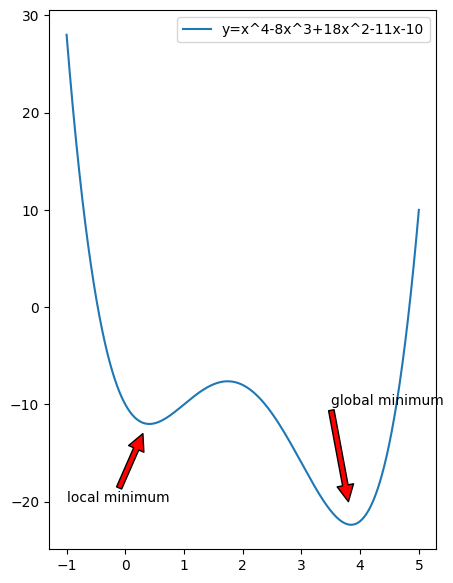

In [ ]:
# 4차 함수 아무렇게 정의
def function(x):
    y = x ** 4 - 8 * x ** 3 + 18 * x ** 2 - 11 * x -10
    return y

# -1부터 5까지의 데이터 포인트 1000개 균일한 간격으로 생성
x = np.linspace(-1, 5, 1000)
# 생성한 데이터 x를 4차 함수에 입력
y = function(x)

# 시각화
# figure 사이즈 지정
plt.figure(figsize=(5, 7))
# x, y 곡선 그리기
plt.plot(x, y, label="y=x^4-8x^3+18x^2-11x-10")
# local minimum 위치 화살표 + 텍스트로 표시
plt.annotate("local minimum", xytext=(-1, -20), xy=(0.3, -13), arrowprops={"facecolor": "red"})
# global minimum 위치 화살표 + 텍스트로 표시
plt.annotate("global minimum", xytext=(3.5, -10), xy=(3.8, -20), arrowprops={"facecolor": "red"})
plt.legend() # 범례 표시
# figure 보여주기
plt.show()

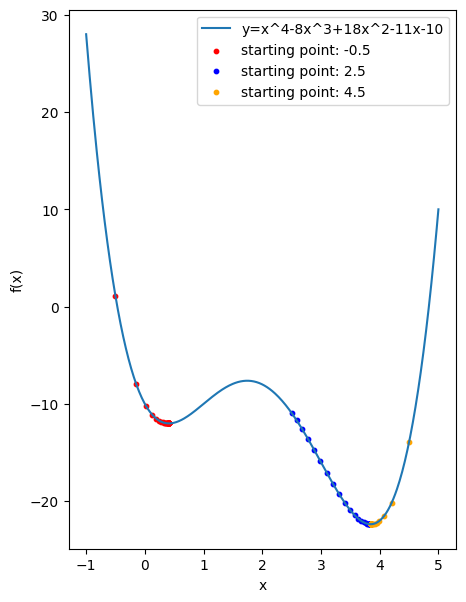

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 함수 정의
def function(x):
    return x ** 4 - 8 * x ** 3 + 18 * x ** 2 - 11 * x -10

# 위에서 정의한 함수의 미분 함수 정의
def derivative(x):
    return 4 * x ** 3 - 24 * x ** 2 + 36 * x - 11

# gradient descent 알고리즘
def gradient_descent(starting_point, learning_rate, iterations):
    # starting 포인트를 x라고 정의
    x = starting_point
    # x가 어떻게 업데이트되는지 담을 리스트 정의
    update_x_list = [x]
    # iteration 만큼 반복 수행
    for i in range(iterations):
        # 미분 값 구하기
        grad = derivative(x)
        # gradient descent 알고리즘 적용
        x -= learning_rate * grad
        # 업데이트된 x값 리스트에 담기
        update_x_list.append(x)
    return update_x_list


# 시각화를 위한 x 값 범위 설정 (-1, 5 사이의 값을 400개 생성)
x = np.linspace(-1, 5, 400)
# x를 함수에 대입
y = function(x)


# gradient descent 적용 (다양한 시작점과 학습률)
starting_points = [-0.5, 2.5, 4.5]  # 다양한 시작점
learning_rate = 0.01
iterations = 30


# 결과 저장
updated_values_list = []
for start in starting_points:
    output = gradient_descent(start, learning_rate, iterations)
    updated_values_list.append(output)


# 결과 시각화
color_list = ["red", "blue", "orange"]

plt.figure(figsize=(5, 7))
plt.plot(x, y, label="y=x^4-8x^3+18x^2-11x-10")
for i, value_list in enumerate(updated_values_list):
    plt.scatter(value_list, function(np.array(value_list)), s=10, label=f'starting point: {starting_points[i]}', color=color_list[i])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

- 이렇게 Gradient Descent 즉, GD는 "미분"이라는 간단한 아이디어로 강력한 알고리즘을 만들어냈지만 아주 심각한 리스크를 안고 있어요
- 그 리스크가 뭐냐면 모델을 최적화할 때 global minimum까지 도달하는 것이 목표지만 초깃값에 따라 local minimum에서 수렴한다는 것이예요
- 그래서 딥러닝 학계에서는 SGD, SGD momentum, RMSProp, AdaGrad, Adam 등의 optimizer 알고리즘을 연구하고 개발했어요

**1. GD (Gradient Descent)**
- 모든 데이터 포인트들에 대해 미분 값을 구하고 업데이트
$$w_{n+1}=w_n - lr \cdot \frac{\partial}{\partial w}f(x)\qquad (2)$$

**2. SGD (Stochastic Gradient Descent)**  
- 배치 단위 데이터셋에서 각 배치마다 랜덤하게 하나 또는 일부의 데이터 포인트들에 대해 미분 값을 구하고 업데이트  

**3. SGD Momentum**   
- momentum(관성)이라는 아이디어를 이용해 미분 값이 0이 될 때 업데이트를 멈춰버리는 SGD의 문제점을 해결한 알고리즘

$$v_{n}= momentum \cdot v_{n-1} - lr \cdot \frac{\partial}{\partial w}f(x)$$
$$w_{n+1} = w_{n} + v_{n}$$

<img src = "https://velog.velcdn.com/images%2Fcrosstar1228%2Fpost%2F760f8856-ed9f-40ec-b4c3-de8ab1fd807d%2Fimage.png">

**4. AdaGrad (Adaptive Gradient)**  
- 업데이트 과정에서 각 데이터 포인트마다 중요도가 달라 각각 다른 learning rate를 적용해 업데이트하도록 제안한 알고리즘
- 즉, 많이 변화하지 않은 weight에 대해서는 learning rate를 크게 설정, 많이 변한 weight에 대해서는 learning rate를 작게 설정

$$g_{n} = g_{n-1} + \left(\frac{\partial}{\partial w}f(x)\right)^2$$  
$$w_{n+1} = w_{n} - lr \cdot \frac{1}{ \sqrt{g_{n}+\epsilon}} \cdot \frac{\partial}{\partial w}f(x)$$



**5. RMSProp (Root Mean Squared Propagation)**  
- AdaGrad의 단점인 학습이 진행될수록 $g_{n}$의 값이 작아지는 점을 개선하기 위해 제안된 알고리즘
- 또한 지수 이동 평균 (Exponential Moving Average)을 이용해 최근 업데이트 값을 더 많이 반영하도록 설계

$$g_{n} = \gamma g_{n-1} + (1-\gamma) \left(\frac{\partial}{\partial w}f(x)\right)^2$$  
$$w_{n+1} = w_{n} - lr \cdot \frac{1}{ \sqrt{g_{n}+\epsilon}} \cdot \frac{\partial}{\partial w}f(x)$$

**6. Adam (Adaptive Moment Estimation)**  
- Momentum과 RMSProp을 합친 알고리즘
- 즉, Momentum의 특징인 관성을 이용해 local minimum에 빠져나오도록 하고 RMSProp을 이용해 weight 업데이트 과정에서 적당한 learning rate를 곱해 업데이트